# traditional-eval-plotting-only
1.30.23

Here we rely on data generated by `traditional-eval.py`. All we do here is make nice looking
plots. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# plotting templates
sns.set(context="talk", style="ticks") 
sns.set_palette("tab10")

## The MCAR experiment

#### Read in and massage the experiment results dataframe

In [2]:
# read in 
recon_err_mcar = pd.read_csv("../output/recon-errors-MCAR-plus-TMT1.csv")

# switch up the column names
recon_err_mcar.columns = ["PXD", "NMF", "KNN", "Sample Min", "Gaussian Sample", "missForest"]

# rename the CPTAC columns
recon_err_mcar.loc[2, "PXD"] = "CPTAC-S051"
recon_err_mcar.loc[3, "PXD"] = "CPTAC-S047"

# drop one dataset, just for the sake of not overloading the final figure
recon_err_mcar = recon_err_mcar.drop(4, axis=0)

# melt
recon_mcar_melted = recon_err_mcar.melt(id_vars="PXD")
recon_mcar_melted.columns = ["PXD", "Method", "MSE"]
# recon_mcar_melted

# get logged MSE
log_mse = np.log(recon_mcar_melted["MSE"])
recon_mcar_melted["Log MSE"] = log_mse

#### Swarmplot

[Text(0, 0, ''),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, '')]

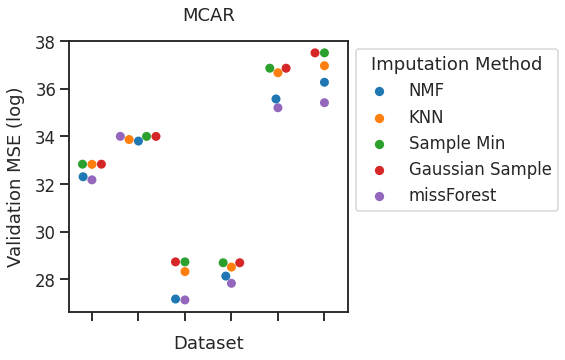

In [3]:
plt.figure(figsize=(5,5))

#fig = sns.swarmplot(data=recon_mcar_melted, x="PXD", y="MSE", hue="Method", size=9.0)
fig = sns.swarmplot(data=recon_mcar_melted, x="PXD", y="Log MSE", hue="Method", size=9.0)

plt.legend(bbox_to_anchor=(1.0, 1.0), title="Imputation Method")
plt.xlabel("Dataset", labelpad=10)
plt.ylabel("Validation MSE (log)", labelpad=10)
plt.title("MCAR", pad=20)

# hide the xtick labels
fig.xaxis.set_ticklabels([])

***

## The MNAR experiment

#### Read in and massage the experiment results dataframe

In [4]:
# read in 
recon_err_mnar = pd.read_csv("../output/recon-errors-MNAR-plus-TMT1.csv")

# switch up the column names
#recon_err_mnar.columns = ["PXD", "Non-negative Matrix Factorization", "k-Nearest Neighbors", "Sample min", "Gaussian sample", "missForest"]
recon_err_mnar.columns = ["PXD", "NMF", "kNN", "Sample min", "Gaussian sample", "missForest"]

# rename the CPTAC columns
recon_err_mnar.loc[2, "PXD"] = "CPTAC-S051"
recon_err_mnar.loc[3, "PXD"] = "CPTAC-S047"

# drop one dataset, just for the sake of not overloading the final figure
recon_err_mnar = recon_err_mnar.drop(4, axis=0)

# melt
recon_mnar_melted = recon_err_mnar.melt(id_vars="PXD")
recon_mnar_melted.columns = ["PXD", "Method", "MSE"]
# recon_mnar_melted

# get logged MSE
log_mse = np.log(recon_mnar_melted["MSE"])
recon_mnar_melted["Log MSE"] = log_mse

#### Swarmplot

[Text(0, 0, ''),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, '')]

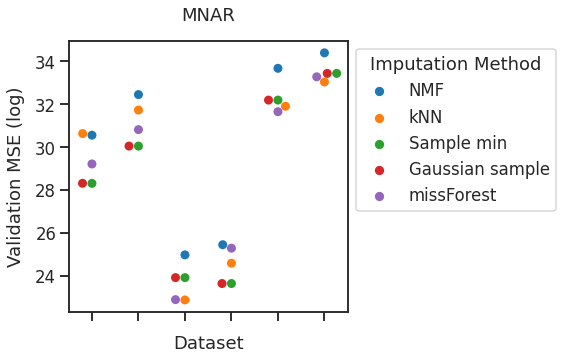

In [5]:
plt.figure(figsize=(5,5))

#fig = sns.swarmplot(data=recon_mnar_melted, x="PXD", y="MSE", hue="Method", size=9.0)
fig = sns.swarmplot(data=recon_mnar_melted, x="PXD", y="Log MSE", hue="Method", size=9.0)

plt.legend(bbox_to_anchor=(1.0, 1.0), title="Imputation Method")
plt.xlabel("Dataset", labelpad=10)
plt.ylabel("Validation MSE (log)", labelpad=10)
plt.title("MNAR", pad=20)

# hide the xtick labels
fig.xaxis.set_ticklabels([])

***

## Plot MNAR and MCAR side-by-side

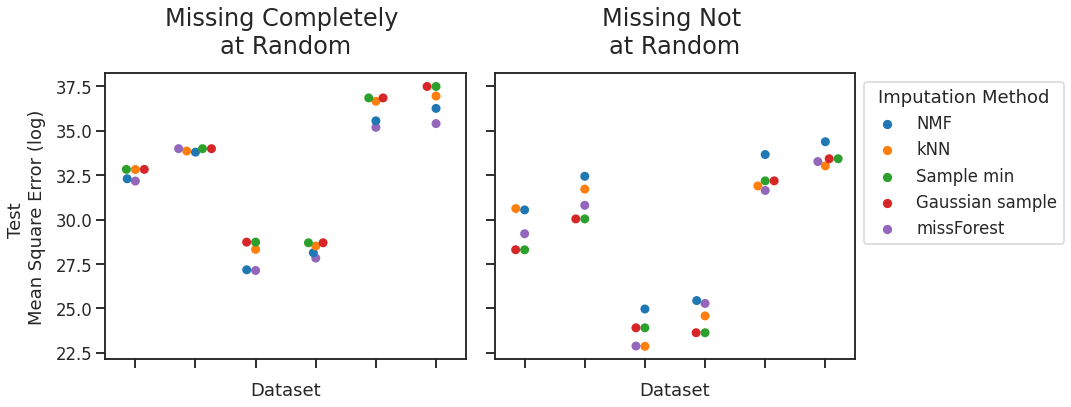

In [6]:
#sns.set_palette("bright")
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,6))

sns.swarmplot(data=recon_mcar_melted, x="PXD", y="Log MSE", hue="Method", size=9.0, ax=axes[0])
axes[0].xaxis.set_ticklabels([])
axes[0].set_title("Missing Completely \nat Random", pad=20, size=24)
axes[0].get_legend().remove()
axes[0].set_xlabel("Dataset", labelpad=10)
axes[0].set_ylabel("Test \nMean Square Error (log)", labelpad=10)

sns.swarmplot(data=recon_mnar_melted, x="PXD", y="Log MSE", hue="Method", size=9.0, ax=axes[1])
axes[1].xaxis.set_ticklabels([])
axes[1].set_title("Missing Not \nat Random", pad=20, size=24)
axes[1].legend(bbox_to_anchor=(1.0, 1.0), title="Imputation Method")
axes[1].set_xlabel("Dataset", labelpad=10)
axes[1].set_ylabel("", labelpad=10)

fig.tight_layout()
#plt.savefig("traditional-eval-spelled-out.png", dpi=250, bbox_inches="tight")

#### The barplot version 

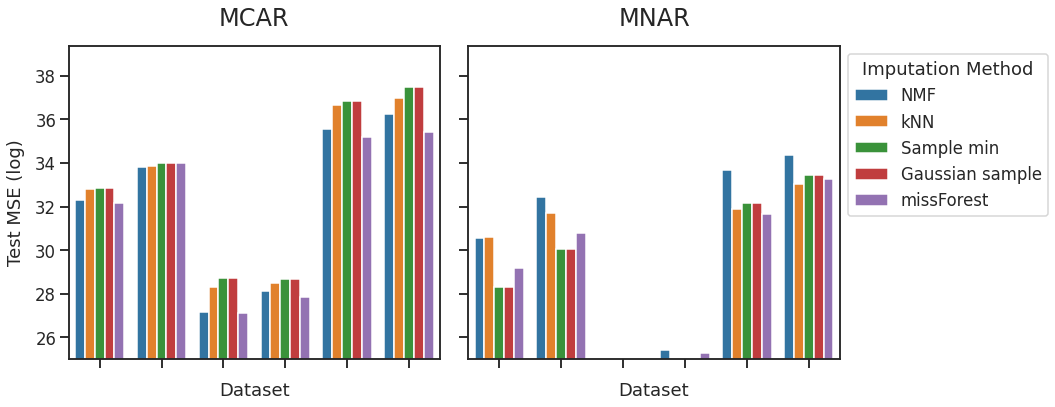

In [7]:
sns.set_palette("tab10")
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,6))

sns.barplot(data=recon_mcar_melted, x="PXD", y="Log MSE", hue="Method", ax=axes[0])
axes[0].xaxis.set_ticklabels([])
axes[0].set_title("MCAR", pad=20, size=24)
axes[0].get_legend().remove()
axes[0].set_xlabel("Dataset", labelpad=10)
axes[0].set_ylabel("Test MSE (log)", labelpad=10)
axes[0].set_ylim(25)

sns.barplot(data=recon_mnar_melted, x="PXD", y="Log MSE", hue="Method", ax=axes[1])
axes[1].xaxis.set_ticklabels([])
axes[1].set_title("MNAR", pad=20, size=24)
axes[1].legend(bbox_to_anchor=(1.0, 1.0), title="Imputation Method")
axes[1].set_xlabel("Dataset", labelpad=10)
axes[1].set_ylabel("", labelpad=10)
axes[1].set_ylim(25)

fig.tight_layout()
#plt.savefig("traditional-barplots.png", dpi=250, bbox_inches="tight")

#### Add in dataset labels

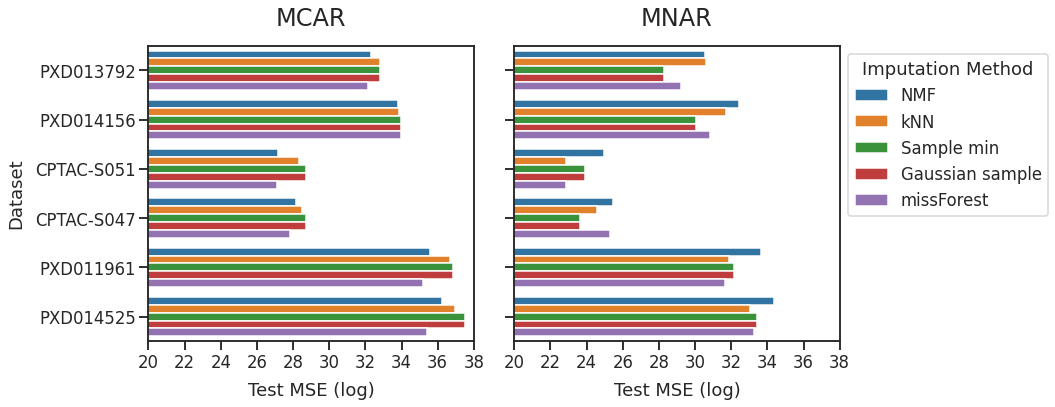

In [10]:
sns.set_palette("tab10")

fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True, figsize=(15,6))

sns.barplot(data=recon_mcar_melted, x="Log MSE", y="PXD", hue="Method", ax=axes[0])
axes[0].set_title("MCAR", pad=20, size=24)
axes[0].get_legend().remove()
axes[0].set_xlabel("Test MSE (log)", labelpad=10)
axes[0].set_ylabel("Dataset", labelpad=10)
axes[0].set_xlim(25)
axes[0].xaxis.set_major_locator(MaxNLocator(integer=True))

sns.barplot(data=recon_mnar_melted, x="Log MSE", y="PXD", hue="Method", ax=axes[1])
axes[1].set_title("MNAR", pad=20, size=24)
axes[1].legend(bbox_to_anchor=(1.0, 1.0), title="Imputation Method")
axes[1].set_xlabel("Test MSE (log)", labelpad=10)
axes[1].set_ylabel("", labelpad=10)
axes[1].set_xlim(20, 38)

fig.tight_layout()
#plt.savefig("../figures/traditional-barplots-plus-TMT.png", dpi=250, bbox_inches="tight")